In [118]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
import sys
import sklearn
import collections
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
%matplotlib inline

In [2]:
libraries = [['Numpy', np],['Pandas', pd],['Matplotlib', matplotlib],['sklearn', sklearn]]
for i in libraries:
    print('{0} Version: {1}'.format(i[0], i[1].__version__))
print("Python:", sys.version)

Numpy Version: 1.14.2
Pandas Version: 0.20.3
Matplotlib Version: 2.1.0
sklearn Version: 0.19.1
Python: 3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]


In [114]:

class bagging_regression_classification:
    def __init__(self, n_trees = 10, max_depth = None, model = 'Regression'):
        """
        model = 'Regression' or 'Classification'
        """
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []
        self.model = model
            
    def pandas_to_numpy(self, X):
        if type(X) == type(pd.DataFrame()) or type(X) == type(pd.Series([1,2])):
            return X.as_matrix()
        if type(X) == type(np.array([1])):
            return X
        else:
            return np.array(X)
        
        
    def handle_1d_data(self, X):
        if X.ndim == 1:
            return X.reshape(-1,1)
        else:
            return X
        
    def convert_to_array(self, X):
        x = self.pandas_to_numpy(X)
        x = self.handle_1d_data(X)
        return x
        
    def bagged_data(self, X, Y):
            
        """
        choose random rows with replacenment
        """
            
        index = np.random.choice(np.arange(len(X)), len(X))
        return X[index], Y[index]
        
    def fit(self, X, Y, model):
        self.model = model
            
        X = self.convert_to_array(X)
        Y  = self.convert_to_array(Y)
            
        if self.model == 'Regression':
            for i in range(self.n_trees):
                bagged_X, bagged_Y = self.bagged_data(X, Y)
                tree =  DecisionTreeRegressor(max_depth= self.max_depth)
                tree.fit(bagged_X, bagged_Y)
                self.trees.append(tree)
        elif self.model == 'Classification':
            for i in range(self.n_trees):
                bagged_X, bagged_Y = self.bagged_data(X, Y)
                tree =  DecisionTreeClassifier(max_depth= self.max_depth)
                tree.fit(bagged_X, bagged_Y)
                self.trees.append(tree)
                
    def predict(self, X):
            
        X = self.convert_to_array(X)
        self.predicts = []
        ensemble_prediction = []
            
        if self.model == 'Regression':
                
            for tree in self.trees:
                self.predicts.append(tree.predict(X))

            self.transpose_pred = np.array(self.predicts).T
                
            for row in self.transpose_pred:
                ensemble_prediction.append(np.mean(row))
            return ensemble_prediction
            
        elif self.model == 'Classification':
                
            for tree in self.trees:
                self.predicts.append(tree.predict(X))

            self.transpose_pred = np.array(self.predicts).T
                
            for row in self.transpose_pred:
                ensemble_prediction.append(collections.Counter(row).most_common(1)[0][0])
            return ensemble_prediction
                
    def score(self, X, Y):
            
        pred = self.predict(X)
            
        if self.model == 'Regression':
            return -1.*np.mean((np.array(pred)- np.array(Y))**2)
            
        elif self.model == 'Classification':
            
            score = 0    
            for a, b in zip(pred, Y):
                if a == b:
                    score +=1
                
            return float(score) / float(len(Y))
                
           
                
                
            

In [79]:
def get_data():
    x = np.linspace(-10,10,300)
    y = np.cos(x)
    return x, y

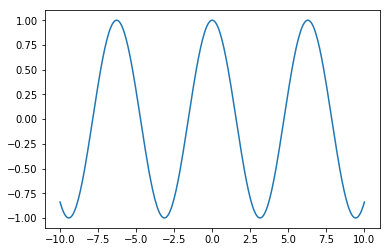

In [80]:
X,y = get_data()
plt.plot(X,y);

In [81]:
def shuffle_data(X, y):
    assert len(X) == len(y)
    permute = np.random.permutation(len(y))
    return X[permute], y[permute]

def train_test_split_manual(X, y, test_size=0.3):
    nX, ny = shuffle_data(X,y)
    split_index = int(len(X)*test_size)
    testX = nX[:split_index]
    trainX = nX[split_index:]
    testy = ny[:split_index]
    trainy = ny[split_index:]
    return trainX, testX, trainy, testy

In [82]:
x_train, x_test, y_train, y_test = train_test_split_manual(X,y,test_size=0.3)

In [83]:
br = bagging_regression_classification(n_trees=2, max_depth=10)
br.fit(x_train, y_train, 'Regression')

In [84]:
br.score(x_test,y_test)

-0.0035914884927345063

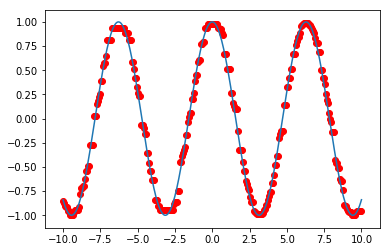

In [87]:
plt.plot(X,y)
plt.scatter(X, br.predict(X), c = 'r')

In [88]:
# Classification

In [89]:
def get_data():
    from sklearn.datasets import load_iris
    iris = load_iris()
    return iris.data, iris.target

In [90]:
X,y = get_data()

In [97]:
x_train, x_test, y_train, y_test = train_test_split_manual(X,y,test_size=0.3)

In [116]:
bc = bagging_regression_classification(n_trees=50,  max_depth=10)
bc.fit(x_train, y_train, 'Classification')

In [119]:
bc.score(x_test,y_test)

0.9555555555555556